### This notebook shows an example of how to visualize the distribution function and the fields. The example simulation is that of a two-stream instability. The corresponding config is (or used to be) that from the `ADEPT` repo

### The way to run this simulation with `ADEPT` is to, from the `ADEPT` directory, run
`python3 run.py --cfg configs/vlasov1d/twostream`

In [2]:
import xarray as xr, numpy as np

### We load the xarray datasets for the distribution function $f(t, x, v)$ here. You will need to specify your own filepath. The best way to find that path is by finding the file in the `mlflow ui`

In [3]:
f = xr.open_dataset("/Users/archis/Dev/code/ergodic/adept/mlruns/882639196812733837/bbdf20854fbf49fcbca5599b37d9b07b/artifacts/binary/dist.nc")

In [4]:
f

<xarray.Dataset> Size: 107MB
Dimensions:   (v: 4096, x: 64, t: 51)
Coordinates:
  * v         (v) float64 33kB -6.398 -6.395 -6.392 -6.389 ... 6.392 6.395 6.398
  * x         (x) float64 512B 0.1636 0.4908 0.818 1.145 ... 20.12 20.45 20.78
  * t         (t) float64 408B 0.0 2.0 4.0 6.0 8.0 ... 92.0 94.0 96.0 98.0 100.0
Data variables:
    electron  (t, x, v) float64 107MB ...

In [5]:
f.coords

Coordinates:
  * v        (v) float64 33kB -6.398 -6.395 -6.392 -6.389 ... 6.392 6.395 6.398
  * x        (x) float64 512B 0.1636 0.4908 0.818 1.145 ... 20.12 20.45 20.78
  * t        (t) float64 408B 0.0 2.0 4.0 6.0 8.0 ... 92.0 94.0 96.0 98.0 100.0

### And then you can plot using the built-in xarray plotters
### Or you can access the underlying Array and coordinates and use your own plotting methods

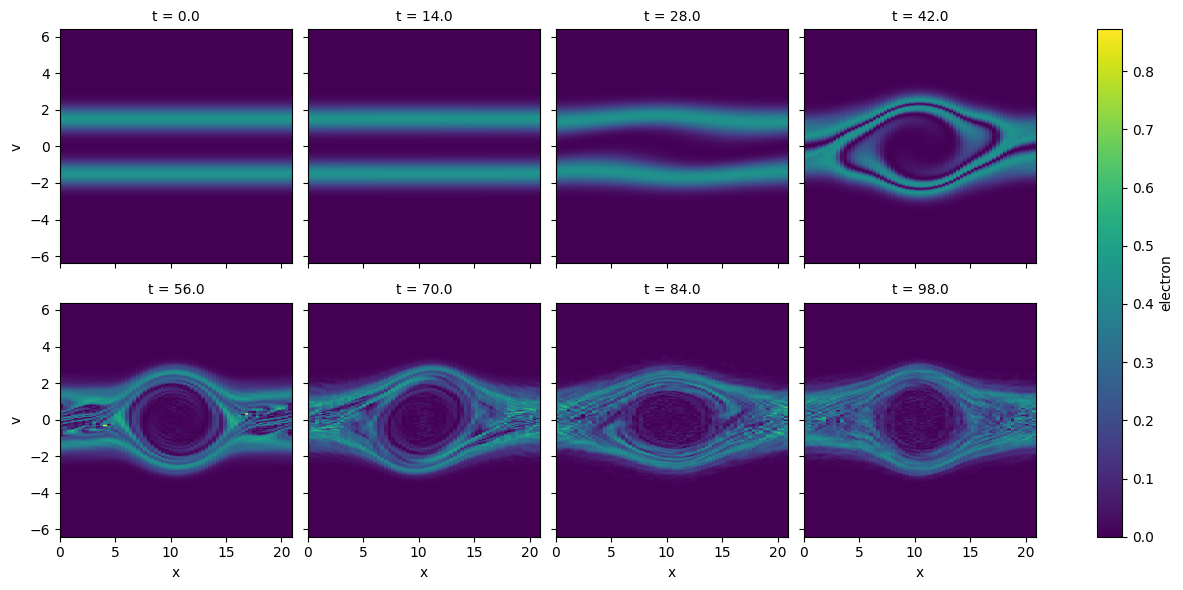

In [9]:
np.abs(f["electron"][::7, ]).T.plot(col="t", col_wrap=4)

### Similarly, you can also plot the fields

In [11]:
flds = xr.open_dataset("/Users/archis/Dev/code/ergodic/adept/mlruns/882639196812733837/bbdf20854fbf49fcbca5599b37d9b07b/artifacts/binary/fields-t=100.0.nc")

In [12]:
flds

<xarray.Dataset> Size: 288kB
Dimensions:        (x: 64, t: 51)
Coordinates:
  * x              (x) float64 512B 0.1636 0.4908 0.818 ... 20.12 20.45 20.78
  * t              (t) float64 408B 0.0 2.0 4.0 6.0 8.0 ... 94.0 96.0 98.0 100.0
Data variables:
    fields--flogf  (t, x) float64 26kB ...
    fields-a       (t, x) float64 26kB ...
    fields-de      (t, x) float64 26kB ...
    fields-e       (t, x) float64 26kB ...
    fields-f^2     (t, x) float64 26kB ...
    fields-n       (t, x) float64 26kB ...
    fields-p       (t, x) float64 26kB ...
    fields-pond    (t, x) float64 26kB ...
    fields-prev_a  (t, x) float64 26kB ...
    fields-q       (t, x) float64 26kB ...
    fields-v       (t, x) float64 26kB ...

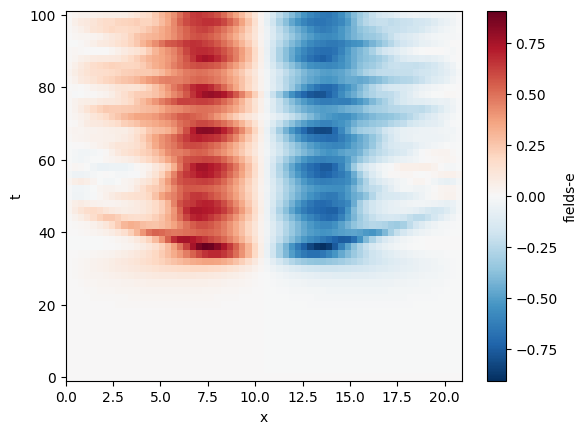

In [14]:
flds["fields-e"].plot()

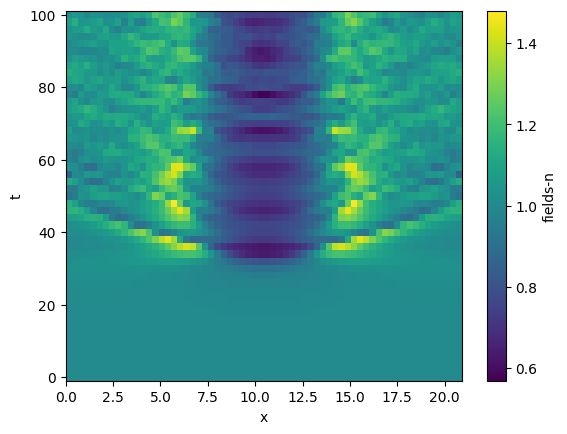

In [20]:
flds["fields-n"].plot()